## Description

 The goal of the project is to construct an intelligent agent that will learn to play the game Rock-Paper-Scissors. More specifically, the agent will observe an image corresponding to 0: Rock, 1: Scissor, or 2: Paper and choose the corresponding symbol that beats it.

## Game Instructions

The  agent will bet 1€ against a "Random Agent" for a total of N rounds. If our agent wins, it will receive 2€, in case of a tie, it will receive 1€, otherwise, it loses 1€. The Random Agent will always play first, selecting a random image from a total of 2100 images (which can be either paper, rock, or scissors).

Because the Random Agent is cunning, it can apply a vertical flip with a probability of p1 = 0.5 and then, with a probability of p2 = 0.5, it can apply a horizontal flip. Lastly, the Random Agent applies random white noise to each pixel of the image with a mean of 0 and a standard deviation of 5% of the maximum pixel value. The operation of the Random Agent can be described as:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from matplotlib import pyplot as plt
from IPython.display import display
import os
from PIL import Image
from PIL import ImageOps
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical  # Import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_path = '/content/drive/My Drive/Data'
paper_path = os.path.join(base_path, 'paper')
scissors_path = os.path.join(base_path, 'scissors')
rock_path = os.path.join(base_path, 'rock')

In [ ]:
def modify(image, size=(30, 30)):
    # Resize the image
    aspect_ratio = image.width / image.height
    new_width, new_height = size
    if aspect_ratio > 1:
        new_height = int(new_width / aspect_ratio)
    else:
        new_width = int(new_height * aspect_ratio)
    resized_image = image.resize(size, Image.LANCZOS)

    # Convert to grayscale
    grayscale_image = resized_image.convert('L')  # 'L' mode for grayscale

    # Normalize the image
    normalized_image = np.array(grayscale_image) / 255.0
    return normalized_image


def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            with Image.open(img_path) as img:
                  images.append(img.copy())
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
    return images



In [ ]:
# Function to split and modify images based on a probability
def split_and_modify_images(images, keep_probability=0.75):
    train_images_modified = []
    test_images = []

    for img in images:
        if random.random() < keep_probability:
            # Keep the image for training and apply 'modify'
            train_images_modified.append(modify(img))
        else:
            # Skip and add to the test list
            test_images.append(img)

    return train_images_modified, test_images

# Load images from different folders
paper_images = load_images_from_folder(paper_path)
scissors_images = load_images_from_folder(scissors_path)
rock_images = load_images_from_folder(rock_path)

# Split and modify images
paper_images_train_modified, paper_images_test = split_and_modify_images(paper_images)
scissors_images_train_modified, scissors_images_test = split_and_modify_images(scissors_images)
rock_images_train_modified, rock_images_test = split_and_modify_images(rock_images)

In [ ]:
# Prepare data for CNN
X_train_cnn = np.array([img.reshape(30, 30, 1) for img in paper_images_train_modified + scissors_images_train_modified + rock_images_train_modified])
y_train_cnn = np.array(['2']*len(paper_images_train_modified) + ['1']*len(scissors_images_train_modified) + ['0']*len(rock_images_train_modified))
y_train_cnn = to_categorical(y_train_cnn, num_classes=3)


# Define the CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

#Train Model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32)


Epoch 1/10
52/52 [==============================] - 4s 39ms/step - loss: 0.9696 - accuracy: 0.5668
Epoch 2/10
52/52 [==============================] - 2s 31ms/step - loss: 0.4802 - accuracy: 0.8420
Epoch 3/10
52/52 [==============================] - 2s 31ms/step - loss: 0.2909 - accuracy: 0.9109
Epoch 4/10
52/52 [==============================] - 2s 31ms/step - loss: 0.2481 - accuracy: 0.9182
Epoch 5/10
52/52 [==============================] - 2s 38ms/step - loss: 0.2026 - accuracy: 0.9365
Epoch 6/10
52/52 [==============================] - 2s 31ms/step - loss: 0.1704 - accuracy: 0.9481
Epoch 7/10
52/52 [==============================] - 2s 46ms/step - loss: 0.1601 - accuracy: 0.9555
Epoch 8/10
52/52 [==============================] - 3s 49ms/step - loss: 0.1116 - accuracy: 0.9658
Epoch 9/10
52/52 [==============================] - 2s 31ms/step - loss: 0.1012 - accuracy: 0.9646
Epoch 10/10
52/52 [==============================] - 2s 31ms/step - loss: 0.0835 - accuracy: 0.9738


In [ ]:
# Flatten the images and create the feature matrix (X) and the target vector (y)
X_train_lr = np.array([img.flatten() for img in paper_images_train_modified + scissors_images_train_modified + rock_images_train_modified])
y_train_lr = np.array(['2']*len(paper_images_train_modified) + ['1']*len(scissors_images_train_modified) + ['0']*len(rock_images_train_modified))

# Initialize and train the logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train_lr, y_train_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Function to add noise to an image
def add_noise(image, mean=0, std_dev=0.05):
    noise = np.random.normal(mean, std_dev, image.shape)
    noisy_image = np.clip(image + noise, 0, 1)
    return noisy_image

# New response function using CNN
def choose_response_cnn(image):
    image_cnn = image.reshape(1, 30, 30, 1)
    prediction = model_cnn.predict(image_cnn)[0]
    response = np.argmax(prediction)
    if np.argmax(prediction) == 0:  # Rock
        return 2 #Paper
    elif np.argmax(prediction) == 1:  # Scissors
        return 0 #Rock
    else:  # prediction == '2', Paper
        return 1 #Scissors

def choose_response_Lr(image):
    prediction = model_lr.predict([image.flatten()])[0]
    if prediction == '0':  # Rock
        return 2 #Paper
    elif prediction == '1':  # Scissors
        return 0 #Rock
    else:  # prediction == '2', Paper
        return 1 #Scissors

# Game evaluation function
def evaluate_game(a, b , model):
    global wins_cnn, loses_cnn, draws_cnn, wins_lr, loses_lr, draws_lr
    if a == b:
      if(model == 'CNN'):
        draws_cnn += 1
      else:
        draws_lr += 1
    elif (a == 0 and b == 1) or (a == 1 and b == 2) or (a == 2 and b == 0):
      if(model == 'CNN'):
        loses_cnn += 1
      else:
        loses_lr += 1
    else:
      if(model == 'CNN'):
        wins_cnn += 1
      else:
        wins_lr += 1

In [ ]:
n = len(paper_images_test) + len(rock_images_test) + len(scissors_images_test)
counter = 0
wins_cnn, loses_cnn, draws_cnn = 0, 0, 0
wins_lr, loses_lr, draws_lr = 0, 0, 0

paper_images_complete, rock_images_complete, scissors_images_complete = False, False, False

cumulative_wins_cnn = []
cumulative_losses_cnn = []
cumulative_draws_cnn = []
wallet_balance_cnn = []

cumulative_wins_lr = []
cumulative_losses_lr = []
cumulative_draws_lr = []
wallet_balance_lr = []

# Main loop for playing the game
for i in range(n):
    # Select the next image and apply transformations
    if not rock_images_complete:
        selected_image = rock_images_test[counter]
        action = 0
        counter += 1
        if counter == len(rock_images_test):
            counter = 0
            rock_images_complete = True
    elif not scissors_images_complete:
        selected_image = scissors_images_test[counter]
        action = 1
        counter += 1
        if counter == len(scissors_images_test):
            counter = 0
            scissors_images_complete = True
    elif not paper_images_complete:
        selected_image = paper_images_test[counter]
        action = 2
        counter += 1
        if counter == len(paper_images_test):
            counter = 0
            paper_images_complete = True
    else:
        break

    # Apply random flips with probability 0.5
    if random.random() < 0.5:
        selected_image = ImageOps.flip(selected_image)
    if random.random() < 0.5:
        selected_image = ImageOps.mirror(selected_image)

    # Modify and add noise to the selected image
    selected_image = modify(selected_image)
    selected_image = add_noise(selected_image)

    # Get the response from the CNN model
    response_cnn = choose_response_cnn(selected_image)

    # Get the response from the Lr model
    response_lr = choose_response_Lr(selected_image)


    # Evaluate the game result for the CNN model
    evaluate_game(action, response_cnn, 'CNN')

    # Evaluate the game result for the LR model
    evaluate_game(action, response_lr, 'LR')

    cumulative_wins_cnn.append(wins_cnn)
    cumulative_losses_cnn.append(loses_cnn)
    cumulative_draws_cnn.append(draws_cnn)
    wallet_balance_cnn.append(wins_cnn - loses_cnn)

    cumulative_wins_lr.append(wins_lr)
    cumulative_losses_lr.append(loses_lr)
    cumulative_draws_lr.append(draws_lr)
    wallet_balance_lr.append(wins_lr - loses_lr)

# Print results
print('Results for the CNN model :')
print('Wins:', wins_cnn)
print('Loses:', loses_cnn)
print('Draws:', draws_cnn)
print('Wallet:', wins_cnn - loses_cnn)

# Print results
print('Results for the LR model :')
print('Wins:', wins_lr)
print('Loses:', loses_lr)
print('Draws:', draws_lr)
print('Wallet:', wins_lr - loses_lr)

1/1 [==============================] - 0s 22ms/step
Results for the CNN model :
Wins: 426
Loses: 88
Draws: 35
Wallet: 338
Results for the LR model :
Wins: 263
Loses: 150
Draws: 136
Wallet: 113


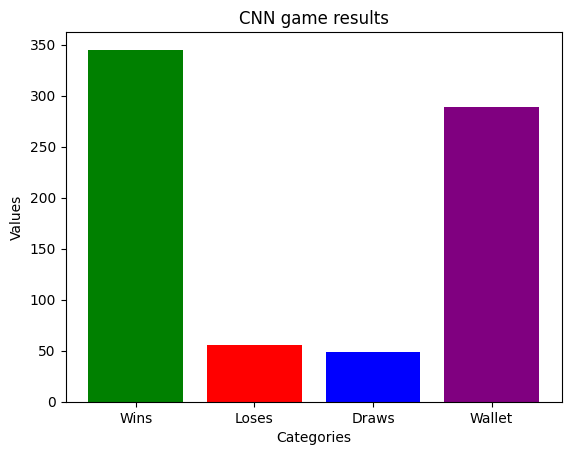

In [ ]:
# Bar plot for the CNN model
categories = ['Wins', 'Loses', 'Draws', 'Wallet']
values = [wins_cnn, loses_cnn, draws_cnn, wins_cnn - loses_cnn]

# Creating the bar plot
plt.bar(categories, values, color=['green', 'red', 'blue', 'purple'])

# Adding titles and labels
plt.title('CNN game results')
plt.xlabel('Categories')
plt.ylabel('Values')

# Show the plot
plt.show()

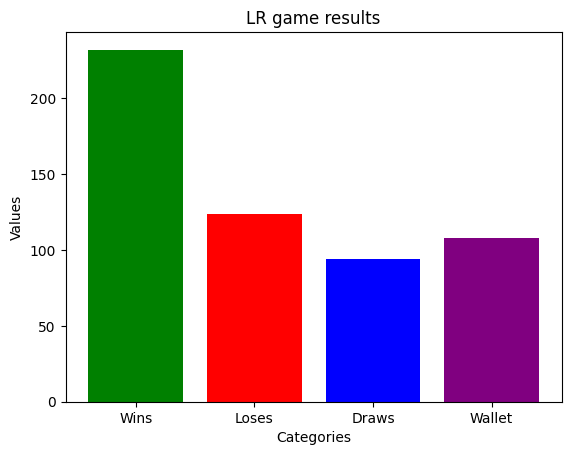

In [ ]:
# Bar plot for the Lr model
categories = ['Wins', 'Loses', 'Draws', 'Wallet']
values = [wins_lr, loses_lr, draws_lr, wins_lr - loses_lr]

# Creating the bar plot
plt.bar(categories, values, color=['green', 'red', 'blue', 'purple'])

# Adding titles and labels
plt.title('LR game results')
plt.xlabel('Categories')
plt.ylabel('Values')

# Show the plot
plt.show()

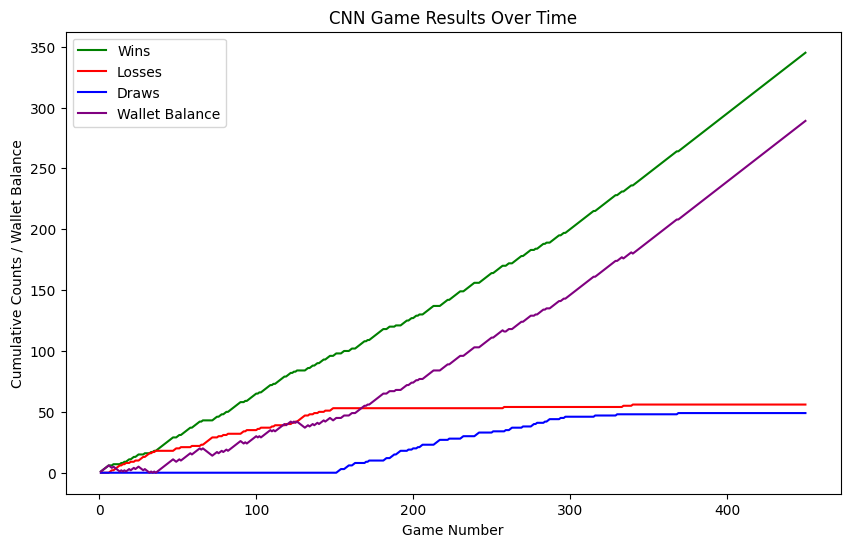

In [ ]:
# Line chart for the CNN model

games = list(range(1, n + 1))
# Creating the line plot
plt.figure(figsize=(10, 6))
plt.plot(games, cumulative_wins_cnn, label='Wins', color='green')
plt.plot(games, cumulative_losses_cnn, label='Losses', color='red')
plt.plot(games, cumulative_draws_cnn, label='Draws', color='blue')
plt.plot(games, wallet_balance_cnn, label='Wallet Balance', color='purple')

# Adding titles and labels
plt.title('CNN Game Results Over Time')
plt.xlabel('Game Number')
plt.ylabel('Cumulative Counts / Wallet Balance')
plt.legend()

# Show the plot
plt.show()

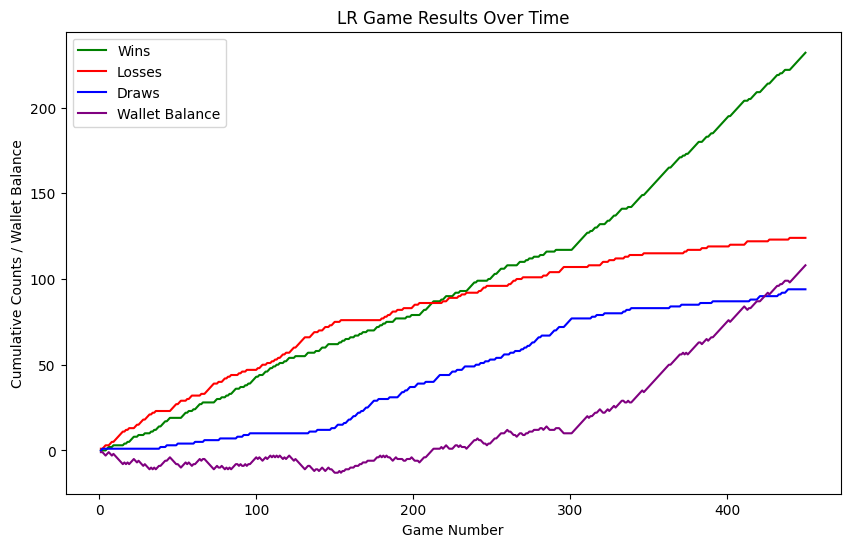

In [ ]:
# Line chart for the LR model

games = list(range(1, 451))
# Creating the line plot
plt.figure(figsize=(10, 6))
plt.plot(games, cumulative_wins_lr, label='Wins', color='green')
plt.plot(games, cumulative_losses_lr, label='Losses', color='red')
plt.plot(games, cumulative_draws_lr, label='Draws', color='blue')
plt.plot(games, wallet_balance_lr, label='Wallet Balance', color='purple')

# Adding titles and labels
plt.title('LR Game Results Over Time')
plt.xlabel('Game Number')
plt.ylabel('Cumulative Counts / Wallet Balance')
plt.legend()

# Show the plot
plt.show()